In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Wholesale = pd.read_csv("Wholesale customers data.csv");
feature = Wholesale;

# 1. EDA of Wholesale customers data 

In [2]:
Wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
Wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
Wholesale.shape
# 440 rows and 8 columns

(440, 8)

In [5]:
Wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
Wholesale.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Nothing is null

(array([[440.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [440.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [267., 109.,  38.,  16.,   4.,   3.,   2.,   0.,   0.,   1.],
        [389.,  37.,   8.,   3.,   2.,   0.,   1.,   0.,   0.,   0.],
        [340.,  75.,  17.,   3.,   2.,   1.,   1.,   0.,   1.,   0.],
        [422.,  15.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.],
        [415.,  20.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
        [436.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.]]),
 array([1.00000e+00, 1.12160e+04, 2.24310e+04, 3.36460e+04, 4.48610e+04,
        5.60760e+04, 6.72910e+04, 7.85060e+04, 8.97210e+04, 1.00936e+05,
        1.12151e+05]),
 <a list of 8 BarContainer objects>)

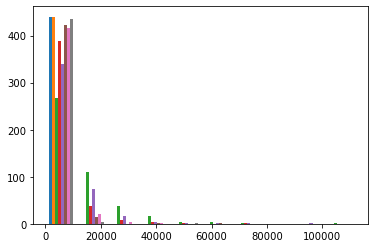

In [7]:
plt.hist(Wholesale) 

By applying a heatmap with the corrletaion we can see how each feature realted to one and another.

<AxesSubplot:>

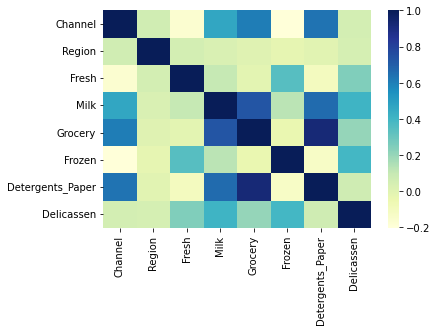

In [8]:
sb.heatmap(Wholesale.corr(),cmap="YlGnBu")

#### From this we dont have to worry about the diagonal column as it is expected to be 1, but from looking at the column of all the data we can see that Region has the least corrletaion with all other columns. Therefore, this would be a good reasion to drop it, as it does not add anything to the dataset. 

In [9]:
for x in Wholesale.columns:
    print(x,":",len(Wholesale.groupby(Wholesale[x]).mean()))

Channel : 2
Region : 3
Fresh : 433
Milk : 421
Grocery : 430
Frozen : 426
Detergents_Paper : 417
Delicassen : 403


#### From this we can see that Channel covers the all the other columns, with 2 values.  Likewise, the region column also covers all other columns with 3 values. Therefore, I will be assuming that region and channel will be discrete varables, and the rest are continuous.  Additionally, as stated before the region column has the least ammount of corrletaion to any other column. Thus, we can remove the region column.

In [10]:
clean_wholesale = Wholesale.drop(['Region'],axis =1);
clean_wholesale.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


## Note: I am also treating Channel as a target varable, so I will not be including it in the scaling

# 2. Feature Scaling to Normalize the data(comparing the histogram/KDE for MinMaxScaler and StandardScaler)

In [11]:
import warnings
warnings.simplefilter("ignore")
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

<AxesSubplot:ylabel='Density'>

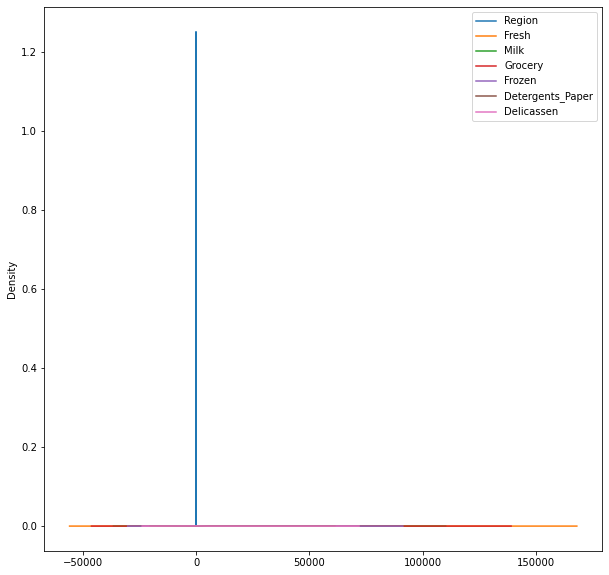

In [12]:
pd.DataFrame(Wholesale.drop(["Channel"], axis = 1)).plot(kind='kde',figsize=(10,10))

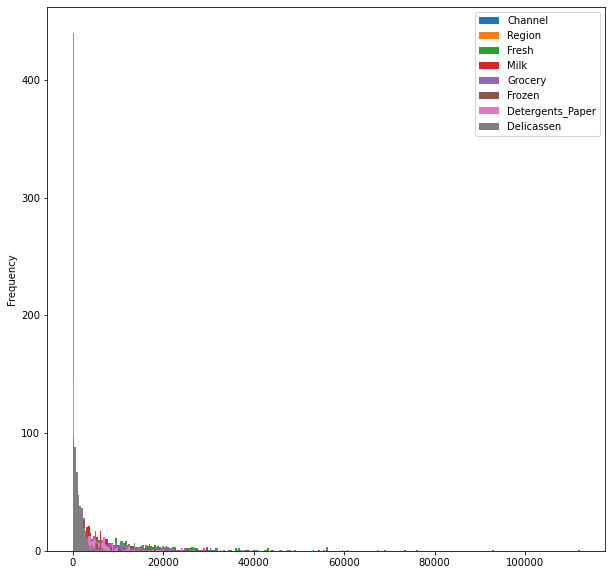

In [13]:
pd.DataFrame(Wholesale).plot(kind='hist', bins=300, figsize=(10,10));

Without removing the Channel, and Region colunm 

<AxesSubplot:ylabel='Density'>

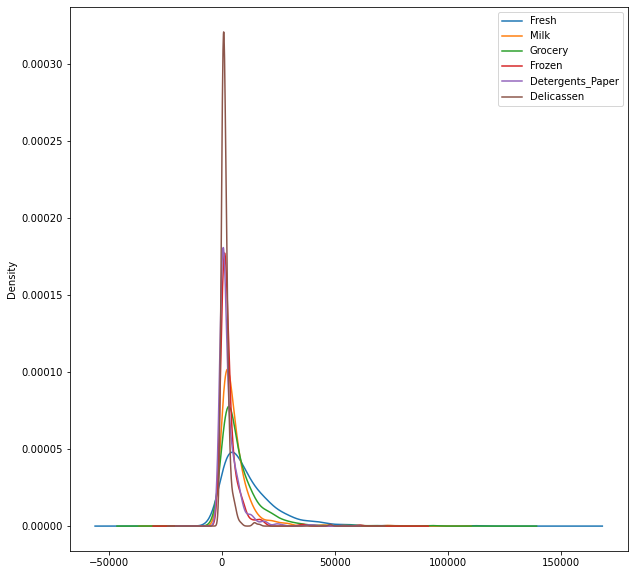

In [14]:
dropped_read = Wholesale.drop(["Region",'Channel'],axis = 1)
pd.DataFrame(dropped_read).plot(kind='kde',figsize=(10,10))

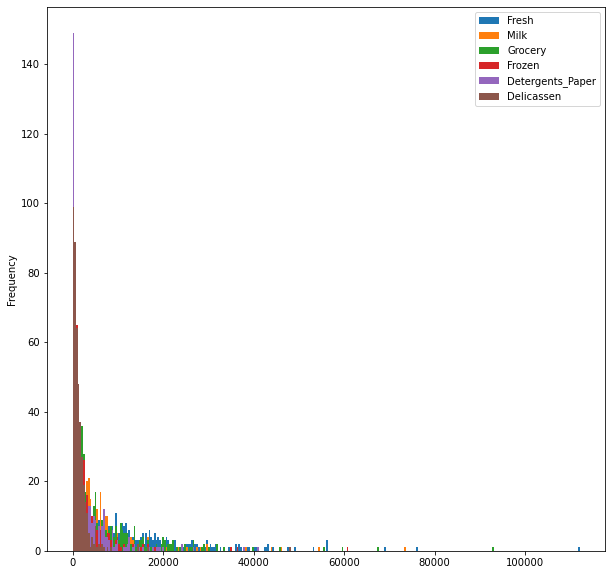

In [15]:
pd.DataFrame(dropped_read).plot(kind='hist', bins=300, figsize=(10,10));

As stated before, both the channel, and region column are descrete values and we will be dropping the region column as it has the least ammount of corrletaion to any other column. Also, I have stated above that I will be treating the channel column as as target coloumn so I will not be scaling it. By dropping both we get a better display of our overall plot(histogram and KDE). Therefore, dropping the region and discluding column(target varable) it would be the best course of action.

In [16]:
clean_wholesale.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


###  MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit_transform(clean_wholesale)

In [18]:
pd.DataFrame(minmax).describe()

,0,1,2,3,4,5,6
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### KDE Graph

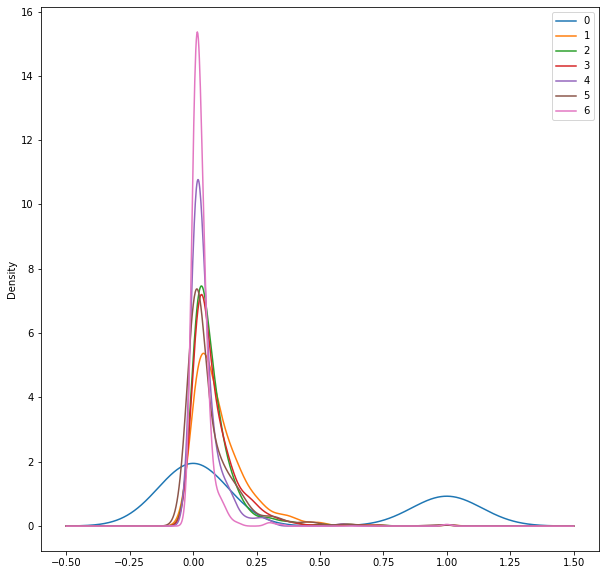

In [19]:
pd.DataFrame(minmax).plot(kind='kde',figsize=(10,10));

#### Histogram

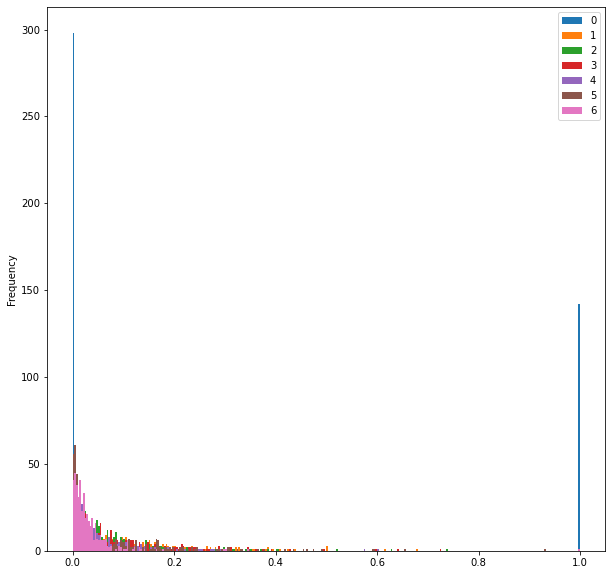

In [20]:
pd.DataFrame(minmax).plot(kind='hist', bins=300, figsize=(10,10));

### StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler
stnd = StandardScaler().fit_transform(clean_wholesale)

In [22]:
pd.DataFrame(stnd).describe()

,0,1,2,3,4,5,6
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


#### KDE Graph

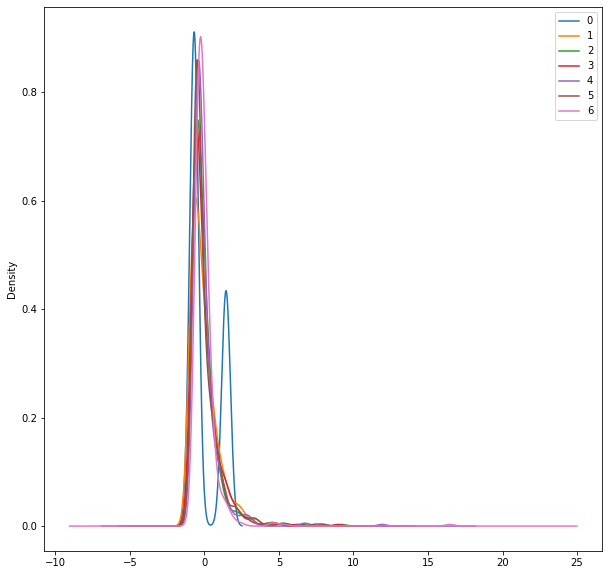

In [23]:
pd.DataFrame(stnd).plot(kind='kde',figsize=(10,10));

#### Histogram

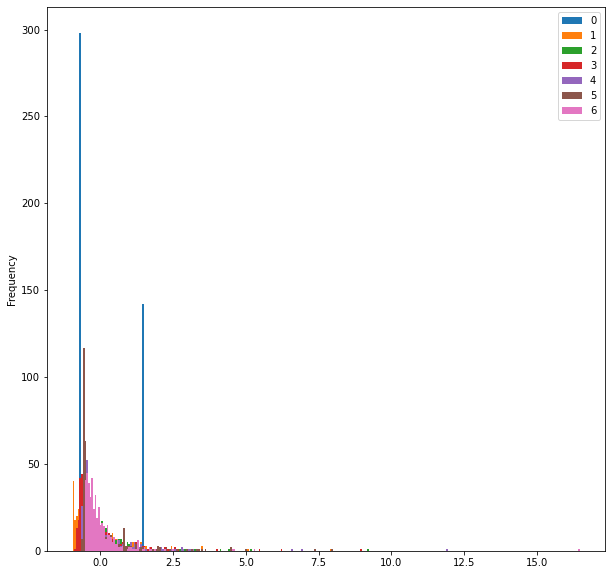

In [24]:
pd.DataFrame(stnd).plot(kind='hist', bins=300, figsize=(10,10), legend = True);

### After looking at both the difference scaler MinMax and Standard, both the histogram doesnt show a good indication of which one is better scalered, rather we will look at the KDE we can see that StandardScaler does a better job then the MinMax Scaler at scaling all the vlaues relative to each other.  Thus, we will be choosing the StandardScaler.

# 3. Number of features selected vs Cross validation score

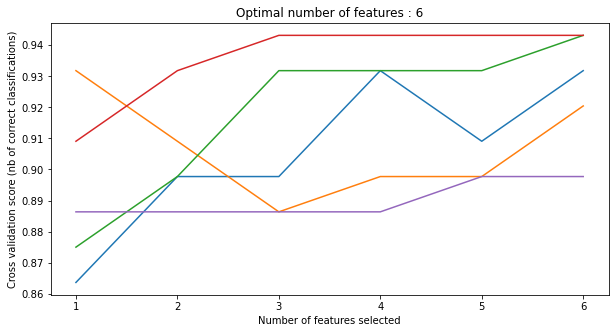

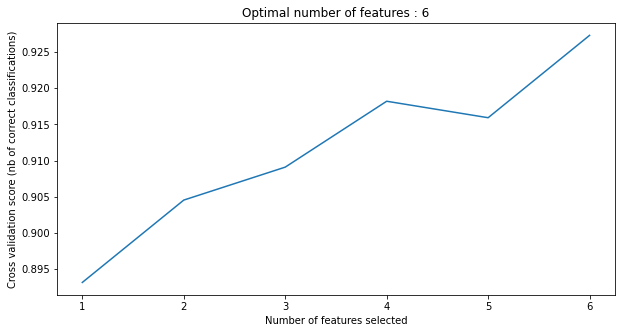

In [25]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
value = clean_wholesale.drop(["Channel"],axis = 1)
target = clean_wholesale['Channel']
rfecv.fit(value, target)

# Plot number of features VS. cross-validation scores

plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()


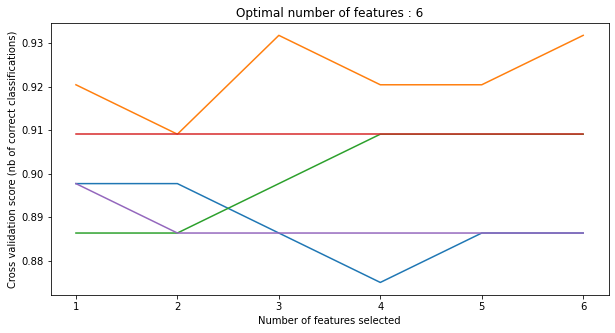

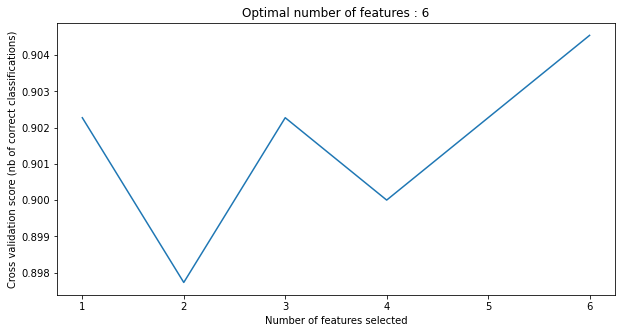

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression();
rfecv = RFECV(estimator=lr)
value = clean_wholesale.drop(["Channel"],axis = 1)
target = clean_wholesale['Channel']
rfecv.fit(value, target)

# Plot number of features VS. cross-validation scores

plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

#### First graph shows the recursive eliminate features, cross-validate the model at each stage, and keep a record of the relationship between model score and number of features. The second graph shows us the mean of the test scores(the features combined) as a single line so we can clearly see it how it improves/deteriorate over an increasing number of features

###### After plotting the graph between number of features selected vs cross validation score using the RandomForest Classifier and LogisticRegression, I have concluded that that the optimal number of feature is 6 i.e. from our data set the total number of features we should be using is 6 to predict our label

# 4. Implement KMeans Clustering

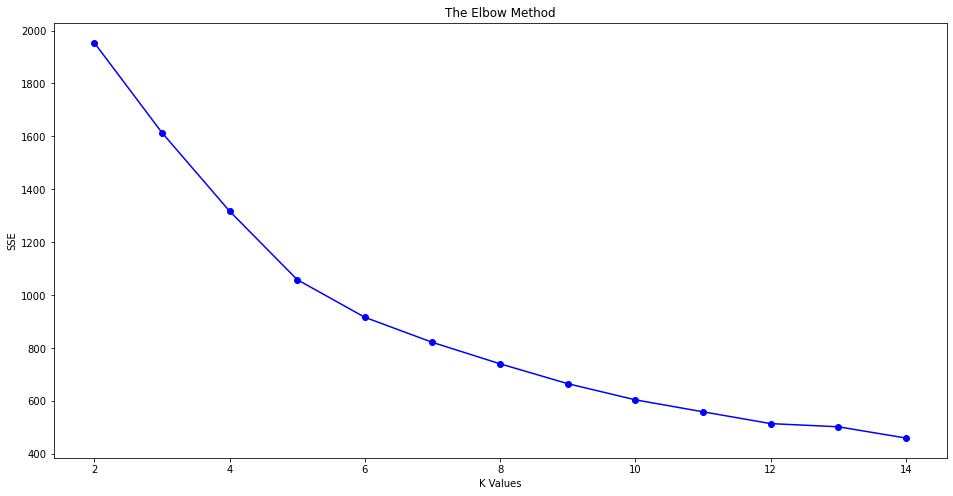

In [27]:
# From part 2 we figured out the StandardScaler was the better option 
# so we will be using that.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = clean_wholesale.drop(["Channel"],axis = 1);
feature_scaled = StandardScaler().fit_transform(X)

df=pd.DataFrame(feature_scaled)

sse = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    sse.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, sse,'bo-')
plt.xlabel('K Values')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()


From the graph above where we conduted the elbow method we can see that optimum number of clusters is 6

# 5. PCA

In [28]:
feature_scaled = pd.DataFrame(feature_scaled, columns=clean_wholesale.drop(["Channel"],axis=1).columns)
feature_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [29]:
from sklearn.decomposition import PCA
pca_value= [];

### First 2 components 

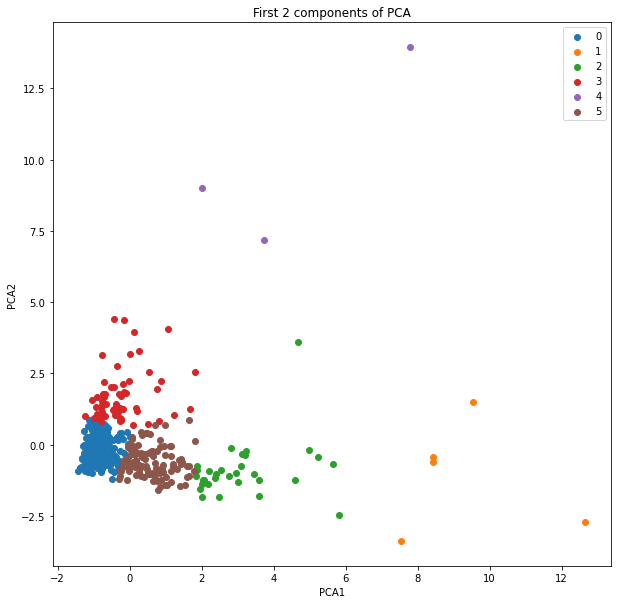

In [30]:
pca = PCA(n_components=2)
pca = pca.fit(feature_scaled)
mean = KMeans(n_clusters=6, init = 'k-means++', random_state=42)

pca_plot = pca.transform(feature_scaled)
km = mean.fit_predict(pca_plot)
plt.figure(figsize=(10,10))
for i in  np.unique(km):
    plt.scatter(pca_plot[km == i , 0] , pca_plot[km == i , 1] , label = i)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.title("First 2 components of PCA")
plt.show()

pca_value.append(pca.explained_variance_)
pca_value.append(pca.explained_variance_ratio_)


### First 4 components

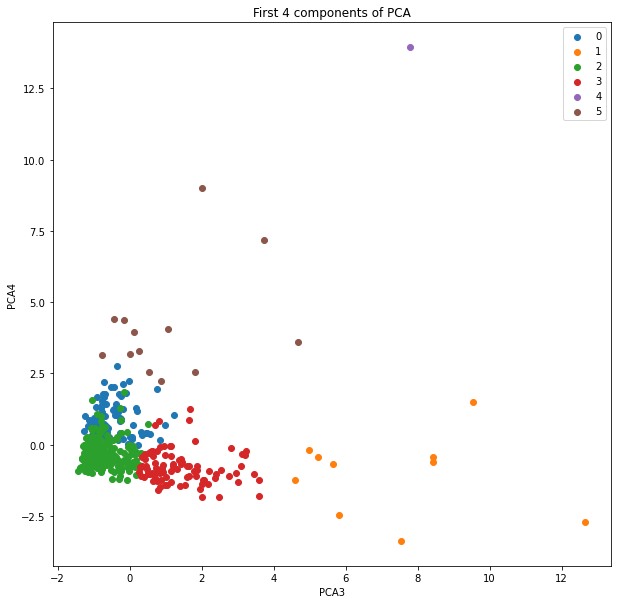

In [31]:
pca = PCA(n_components=4)
pca = pca.fit(feature_scaled)
mean = KMeans(n_clusters=6, init = 'k-means++', random_state=42)

pca_plot = pca.transform(feature_scaled)
km = mean.fit_predict(pca_plot)
plt.figure(figsize=(10,10))
for i in  np.unique(km):
    plt.scatter(pca_plot[km == i , 0] , pca_plot[km == i , 1] , label = i)
plt.xlabel("PCA3")
plt.ylabel("PCA4")
plt.legend()
plt.title("First 4 components of PCA")
plt.show()

pca_value.append(pca.explained_variance_)
pca_value.append(pca.explained_variance_ratio_)

In [32]:
print("Variance between first 2 and first 4 components\n")
print("First 2 components")
for x in range(0,len(pca_value)-2):
    print(pca_value[x]);
print("\nFirst 4 components")
for x in range(2,len(pca_value)):
    print(pca_value[x]);

Variance between first 2 and first 4 components

First 2 components
[2.65099857 1.70646229]
[0.44082893 0.283764  ]

First 4 components
[2.65099857 1.70646229 0.74175057 0.56501435]
[0.44082893 0.283764   0.12334413 0.09395504]


# 6. Implementing XGBoost Classifier with 5 Fold CV

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

Wholesale = pd.read_csv("Wholesale customers data.csv");
clean_wholesale = Wholesale.drop(['Region'],axis =1);
label = clean_wholesale["Channel"];
#print(label)
#value = np.unique(label)
#print(value);

#There are only two values in the label, so we will be mapping it to 0,1

label[label == 1] = 0;
label[label == 2] = 1;

feature = feature_scaled;

kn = KFold(n_splits=5);
xgb = XGBClassifier()


acc = cross_val_score(xgb,feature,label,cv=kn)
prt_avg = acc.mean()*100

pre = cross_val_score(xgb,feature,label,cv=kn,scoring="precision")
prt_per = pre.mean()*100

recall = cross_val_score(xgb,feature,label,cv=kn,scoring="recall")
prt_re = recall.mean()*100

print("Accuracy: %.4f , Recall: %.4f , Precision: %.4f" % (prt_avg,prt_re,prt_per))

Accuracy: 91.3636 , Recall: 87.5461 , Precision: 84.4789
